## Lv2. 교점에 별 만들기

Ax + By + C = 0으로 표현할 수 있는 n개의 직선이 주어질 때, 이 직선의 교점 중 정수 좌표에 별을 그리려 합니다.

예를 들어, 다음과 같은 직선 5개를

2x - y + 4 = 0
-2x - y + 4 = 0
-y + 1 = 0
5x - 8y - 12 = 0
5x + 8y + 12 = 0
좌표 평면 위에 그리면 아래 그림과 같습니다.

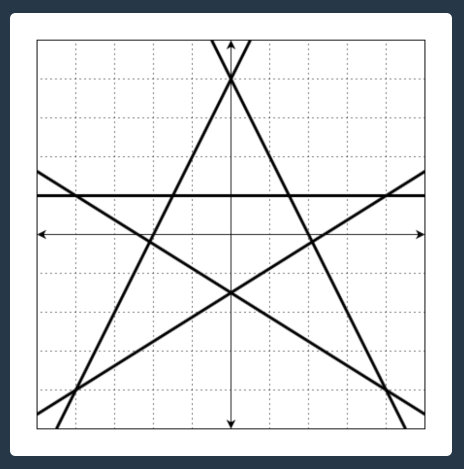

이때, 모든 교점의 좌표는 (4, 1), (4, -4), (-4, -4), (-4, 1), (0, 4), (1.5, 1.0), (2.1, -0.19), (0, -1.5), (-2.1, -0.19), (-1.5, 1.0)입니다. 이 중 정수로만 표현되는 좌표는 (4, 1), (4, -4), (-4, -4), (-4, 1), (0, 4)입니다.

만약 정수로 표현되는 교점에 별을 그리면 다음과 같습니다.

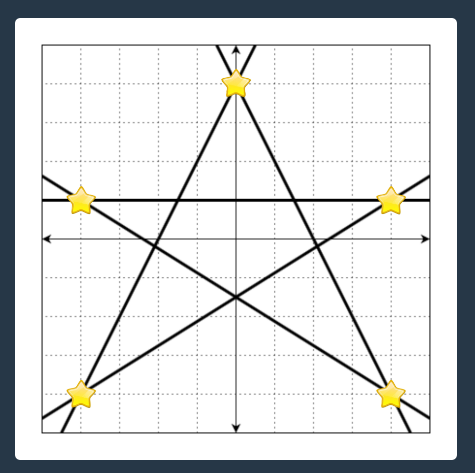

위의 그림을 문자열로 나타낼 때, 별이 그려진 부분은 *, 빈 공간(격자선이 교차하는 지점)은 .으로 표현하면 다음과 같습니다.

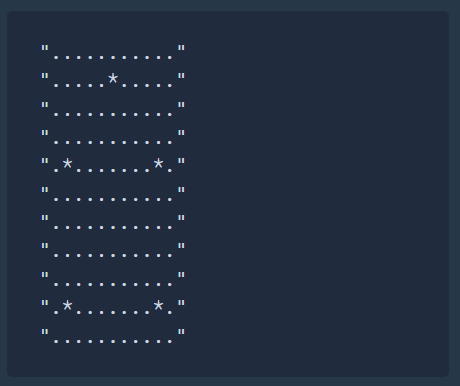

이때 격자판은 무한히 넓으니 모든 별을 포함하는 최소한의 크기만 나타내면 됩니다.

따라서 정답은

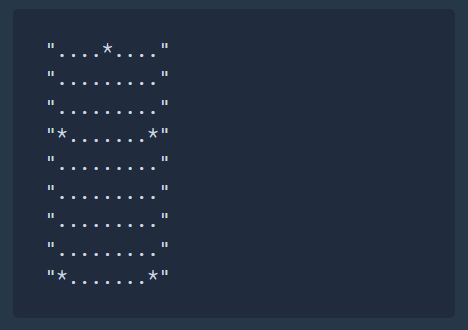


입니다.

직선 A, B, C에 대한 정보가 담긴 배열 line이 매개변수로 주어집니다. 이때 모든 별을 포함하는 최소 사각형을 return 하도록 solution 함수를 완성해주세요.

### 제한사항

- line의 세로(행) 길이는 2 이상 1,000 이하인 자연수입니다.
    - line의 가로(열) 길이는 3입니다.
    - line의 각 원소는 [A, B, C] 형태입니다.
    - A, B, C는 -100,000 이상 100,000 이하인 정수입니다.
    - 무수히 많은 교점이 생기는 직선 쌍은 주어지지 않습니다.
    - A = 0이면서 B = 0인 경우는 주어지지 않습니다.
- 정답은 1,000 * 1,000 크기 이내에서 표현됩니다.
- 별이 한 개 이상 그려지는 입력만 주어집니다.

### 입출력 예

![image-3.png](attachment:image-3.png)

### 입출력 예 #1
문제의 예시와 같습니다.

---

### 입출력 예 #2
직선 y = 1, x = 1, x = -1는 다음과 같습니다.

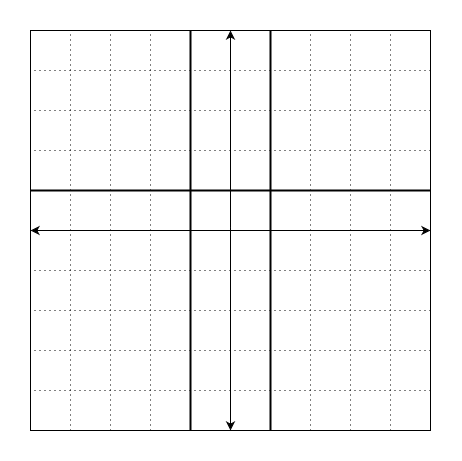

(-1, 1), (1, 1) 에서 교점이 발생합니다.

따라서 정답은  `"*.*"` 입니다

---

### 입출력 예 #3

직선 y = x, y = 2x는 다음과 같습니다.

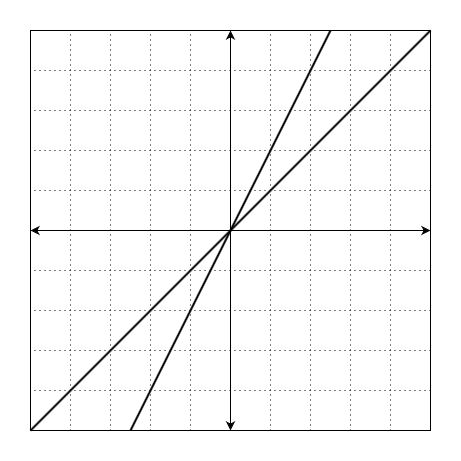

(0, 0) 에서 교점이 발생합니다.

따라서 정답은 `"*"` 입니다.

---

### 입출력 예 #4

직선 y = x, y = 2x, y = 4x는 다음과 같습니다.


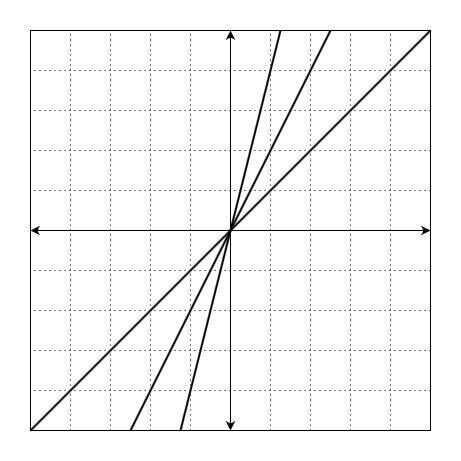

(0, 0) 에서 교점이 발생합니다.

따라서 정답은 `"*"` 입니다.



### 참고사항

Ax + By + E = 0
Cx + Dy + F = 0
두 직선의 교점이 유일하게 존재할 경우, 그 교점은 다음과 같습니다.

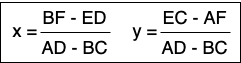

또, AD - BC = 0인 경우 두 직선은 평행 또는 일치합니다.

### 내 풀이

In [44]:
from itertools import combinations as cb

line = [[2, -1, 4], [-2, -1, 4], [0, -1, 1], [5, -8, -12], [5, 8, 12]]

def coor_calcul(line1, line2):
    x1, y1, c1 = line1      # 직선1의 계수 추출 (ax + by = c)
    x2, y2, c2 = line2      # 직선2의 계수 추출 (ax + by = c)

    if x1*y2 == y1*x2:      # 두 직선이 평행한 경우 (교차점이 없는 경우) 확인
        return None

    x = (y1*c2 - c1*y2) / (x1*y2 - y1*x2)  # 교차점의 X 좌표 계산
    y = (c1*x2 - x1*c2) / (x1*y2 - y1*x2)  # 교차점의 Y 좌표 계산

    if x == int(x) and y == int(y):         # X 좌표와 Y 좌표가 모두 정수인지 확인 (정수 교차점인 경우)
        return [int(x), int(y)]

def solution(line):
    points = []         # 교차점을 저장할 리스트

    for line1, line2 in cb(line, 2):   # 주어진 입력 리스트에서 두 직선의 모든 조합을 생성
        point = coor_calcul(line1, line2)   # 두 직선의 교차점 계산
        if point: points.append(point)   # 교차점이 있는 경우, 'points' 리스트에 추가

    # X와 Y 값의 최소값과 최대값을 찾아 최소 크기의 경계 상자를 만듦
    x_min, x_max = min(i[0] for i in points), max(i[0] for i in points) + 1
    y_min, y_max = min(i[1] for i in points), max(i[1] for i in points) + 1

    # 최소 크기의 경계 상자를 생성하고 '.'로 초기화
    answer = [['.'] * (x_max - x_min) for _ in range((y_max - y_min))]

    for x, y in points:
        answer[y - y_min][x - x_min] = '*'   # 각 교차점의 위치에 '*'를 표시하여 경계 상자에 놓음
    answer.reverse()   # 예상된 출력과 일치하도록 행의 순서를 뒤집음

    return [''.join(a) for a in answer]   # 경계 상자를 문자열 리스트로 반환, 각 문자열은 상자의 한 행을 나타냄



### 다른 사람 풀이

In [73]:
# 함수풀이
from itertools import combinations as cb

line = [[0, 0, 0], [1, 0, -1], [1, 0, 1]]

def calculation(eq1, eq2):
    x1, y1, c1 = eq1 # 직선1
    x2, y2, c2 = eq2 # 직선2

    # 기울기가 깉아 해가 없는 경우
    if x1*y2 == y1*x2: 
        return

    # 두 직선의 해
    x = (y1*c2-c1*y2)/(x1*y2-y1*x2)
    y = (c1*x2-x1*c2)/(x1*y2-y1*x2)

    # 두 직선의 해 x, y가 모두 정수라면 반환
    if x == int(x) and y == int(y):
        return [int(x), int(y)]
    
def solution(line):
    points = []

    for eq1, eq2 in cb(line, 2):
        point = calculation(eq1,eq2)
        if point: points.append(point) 

    # 그림의 시작점과 마지막점 찾기
    w1, w2 = min(points, key = lambda x : x[0])[0], max(points, key = lambda x : x[0])[0] + 1
    h1, h2 = min(points, key = lambda x : x[1])[1], max(points, key = lambda x : x[1])[1] + 1

    # 별을 포함하는 최소한의 크기 배열 생성
    answer = [['.'] * (w2 - w1) for _ in range((h2 - h1))]

    # 그림의 시작점을 기준으로 교점 위치 "*" 변환
    for x, y in points:
        answer[y-h1][x-w1] = '*'
    answer.reverse()
    
    return [''.join(a) for a in answer]